# Reproduction Number

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
images_path = Path() / "images"
images_path.mkdir(exist_ok=True)

In [8]:
def R_01(epsilon, beta, b, sigma):
    return epsilon * beta * (1 - b) / sigma


def R_02(beta, b, gamma, eta, mu1):
    return beta * (1 - b) / (gamma + eta + mu1)


def R_0(epsilon, beta, b, sigma, gamma, eta, mu1):
    return R_01(epsilon, beta, b, sigma) + R_02(beta, b, gamma, eta, mu1)


@np.vectorize
def R_0_beta_b(beta, b):
    epsilon = 0.7
    sigma = 0.9
    gamma = 1 / 14
    eta = 1 / 7
    mu1 = 0.05
    return R_0(epsilon, beta, b, sigma, gamma, eta, mu1)

In [16]:
beta_array = np.linspace(0, 1, 1001)
b_array = np.linspace(0, 1, 1001)
beta_mesh, b_mesh = np.meshgrid(beta_array, b_array)
R0_mesh = R_0_beta_b(beta_mesh, b_mesh)

/tmp/ipykernel_7101/2221501383.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


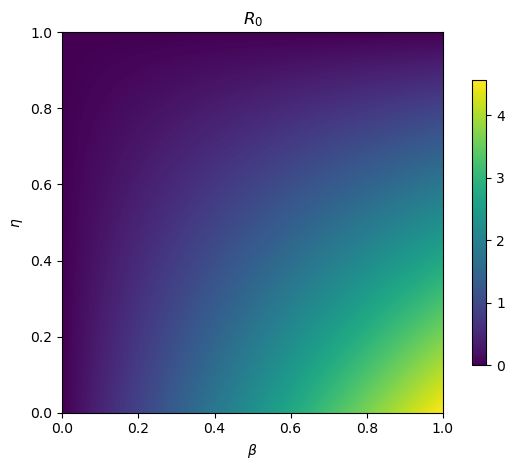

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(R0_mesh, origin="lower", extent=[0, 1, 0, 1])
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\eta$")
ax.set_title(r"$R_0$")
fig.colorbar(im, ax=ax, shrink=0.75)
fig.tight_layout()
fig.savefig(images_path / "seihrt_r0.png", dpi=300)
fig.show()